In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cleaned_data = 'NFL_Game_Data.csv'
games = pd.read_csv(cleaned_data)
games.head()

Date Week  Day    Time           HomeTeam            AwayTeam  \
0  2017-10-19    7  Thu  8:25PM  Las Vegas Raiders  Kansas City Chiefs   
1  2017-10-22    7  Sun  1:00PM  Minnesota Vikings    Baltimore Ravens   
2  2017-10-22    7  Sun  1:00PM   Los Angeles Rams   Arizona Cardinals   
3  2017-10-22    7  Sun  1:00PM   Cleveland Browns    Tennessee Titans   
4  2017-10-22    7  Sun  1:00PM      Chicago Bears   Carolina Panthers   

   HomePoints  AwayPoints  HomeYards  AwayYards  ...  Home_Avg_YardsAllowed  \
0          31          30        505        425  ...                 349.83   
1          24          16        357        208  ...                 295.50   
2          33           0        425        196  ...                 350.17   
3           9          12        284        269  ...                 310.67   
4          17           3        153        293  ...                 302.67   

   Home_Avg_TurnoversForced  Home_WinRate Away_Avg_PointsScored  \
0                      0.83          0.33                 29.50   
1                      1.33          0.67                 19.00   
2                      1.67          0.67                 19.83   
3                      1.17          0.00                 24.33   
4                      1.00          0.33                 21.33   

  Away_Avg_YardsEarned  Away_Avg_Turnovers  Away_Avg_PointsAllowed  \
0               387.00                0.17                   21.67   
1               289.17                2.00                   20.67   
2               356.00                1.50                   26.33   
3               336.00                1.50                   27.33   
4               323.50                1.67                   20.33   

   Away_Avg_YardsAllowed  Away_Avg_TurnoversForced  Away_WinRate  
0                 378.17                      1.33          0.83  
1                 330.83                      2.33          0.50  
2                 340.33                      1.00          0.50  
3                 337.00                      1.17          0.50  
4                 280.00                      0.67          0.67  

[5 rows x 29 columns]

In [3]:
pd.to_datetime(games['Date'])

0      2017-10-19
1      2017-10-22
2      2017-10-22
3      2017-10-22
4      2017-10-22
          ...    
1950   2024-11-03
1951   2024-11-03
1952   2024-11-03
1953   2024-11-03
1954   2024-11-04
Name: Date, Length: 1955, dtype: datetime64[ns]

In [4]:
print(games.describe())

        HomePoints   AwayPoints    HomeYards    AwayYards  HomeTurnovers  \
count  1955.000000  1955.000000  1955.000000  1955.000000    1955.000000   
mean     23.683887    21.953964   350.004604   338.341176       1.297187   
std      10.080349     9.916691    83.507907    86.045641       1.181644   
min       0.000000     0.000000    89.000000    47.000000       0.000000   
25%      17.000000    16.000000   293.000000   280.000000       0.000000   
50%      24.000000    21.000000   352.000000   338.000000       1.000000   
75%      30.000000    29.000000   405.000000   396.500000       2.000000   
max      70.000000    59.000000   726.000000   643.000000       7.000000   

       AwayTurnovers      HomeWin  Home_Avg_PointsScored  \
count    1955.000000  1955.000000            1955.000000   
mean        1.335038     0.551407              22.802368   
std         1.174958     0.497478               5.274130   
min         0.000000     0.000000               7.500000   
25%         0.0

In [5]:
# Check for missing values in the dataset
print(games.isnull().sum())

Date                        0
Week                        0
Day                         0
Time                        0
HomeTeam                    0
AwayTeam                    0
HomePoints                  0
AwayPoints                  0
HomeYards                   0
AwayYards                   0
HomeTurnovers               0
AwayTurnovers               0
HomeWin                     0
Home_Team_Name              0
Away_Team_Name              0
Home_Avg_PointsScored       0
Home_Avg_YardsEarned        0
Home_Avg_Turnovers          0
Home_Avg_PointsAllowed      0
Home_Avg_YardsAllowed       0
Home_Avg_TurnoversForced    0
Home_WinRate                0
Away_Avg_PointsScored       0
Away_Avg_YardsEarned        0
Away_Avg_Turnovers          0
Away_Avg_PointsAllowed      0
Away_Avg_YardsAllowed       0
Away_Avg_TurnoversForced    0
Away_WinRate                0
dtype: int64


In [6]:
# Check the data types of each column
print(games.dtypes)

Date                         object
Week                         object
Day                          object
Time                         object
HomeTeam                     object
AwayTeam                     object
HomePoints                    int64
AwayPoints                    int64
HomeYards                     int64
AwayYards                     int64
HomeTurnovers                 int64
AwayTurnovers                 int64
HomeWin                       int64
Home_Team_Name               object
Away_Team_Name               object
Home_Avg_PointsScored       float64
Home_Avg_YardsEarned        float64
Home_Avg_Turnovers          float64
Home_Avg_PointsAllowed      float64
Home_Avg_YardsAllowed       float64
Home_Avg_TurnoversForced    float64
Home_WinRate                float64
Away_Avg_PointsScored       float64
Away_Avg_YardsEarned        float64
Away_Avg_Turnovers          float64
Away_Avg_PointsAllowed      float64
Away_Avg_YardsAllowed       float64
Away_Avg_TurnoversForced    

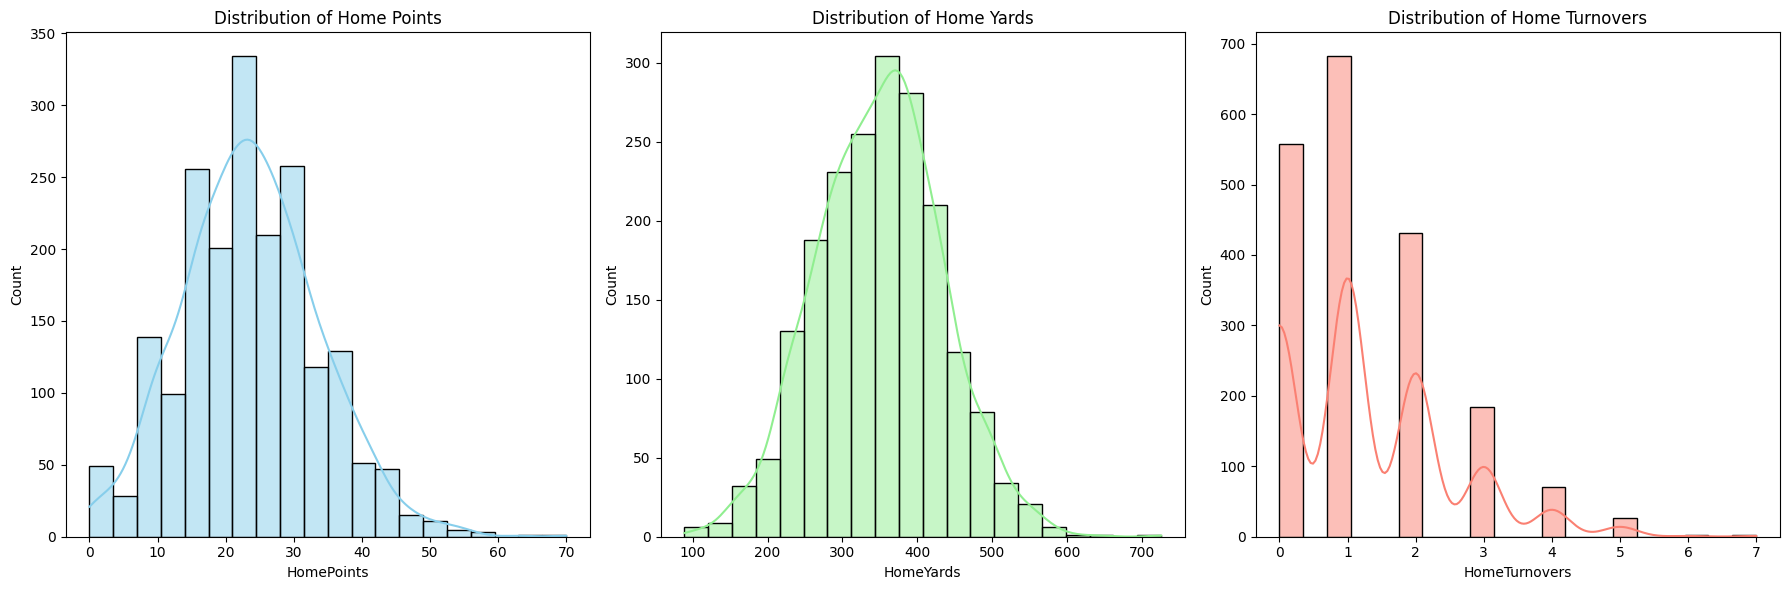

In [7]:
# Plot the distribution of key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Points distribution for Home Team
sns.histplot(games['HomePoints'], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title('Distribution of Home Points')

# Yards distribution for Home Team
sns.histplot(games['HomeYards'], bins=20, kde=True, ax=axes[1], color="lightgreen")
axes[1].set_title('Distribution of Home Yards')

# Turnovers distribution for Home Team
sns.histplot(games['HomeTurnovers'], bins=20, kde=True, ax=axes[2], color="salmon")
axes[2].set_title('Distribution of Home Turnovers')

plt.tight_layout()
plt.show()


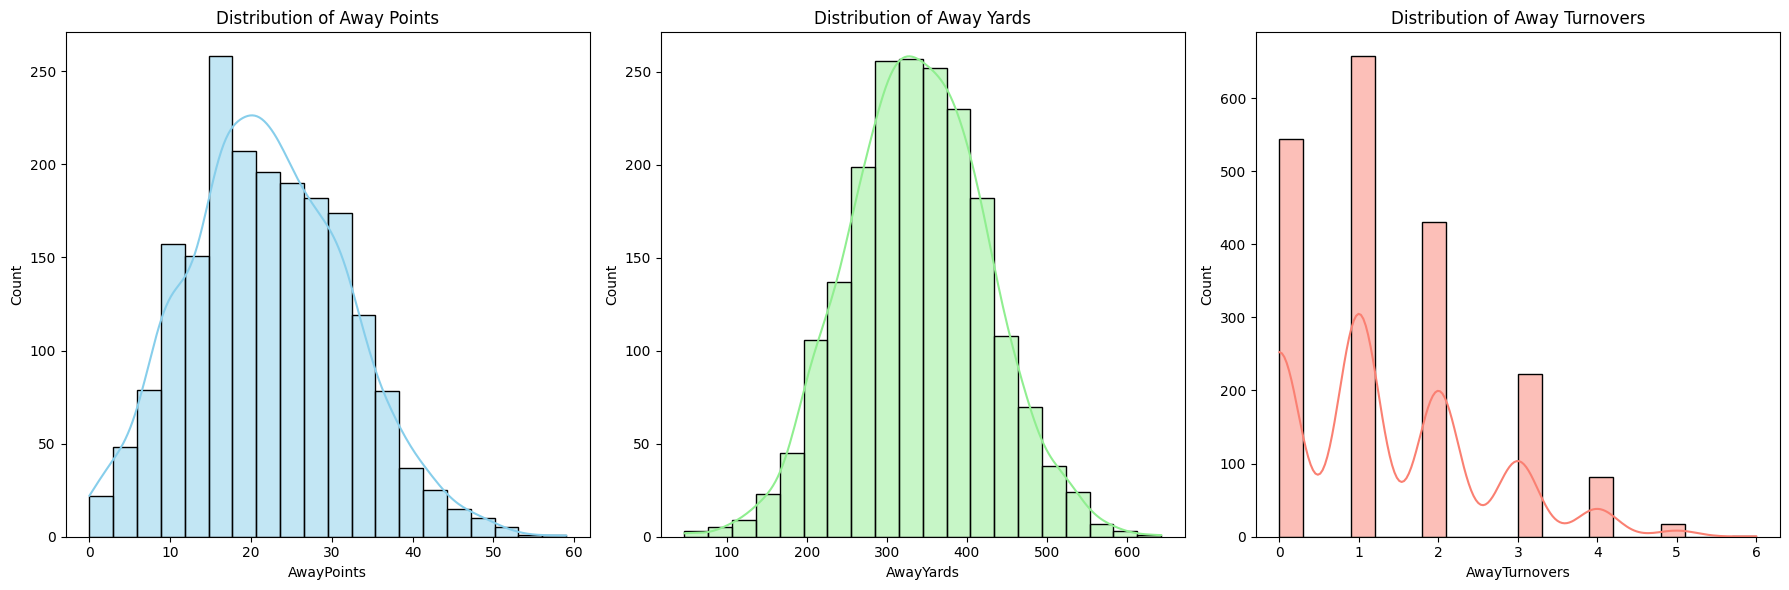

In [8]:
# Plot the distribution of key numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Points distribution for Away Team
sns.histplot(games['AwayPoints'], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title('Distribution of Away Points')

# Yards distribution for Away Team
sns.histplot(games['AwayYards'], bins=20, kde=True, ax=axes[1], color="lightgreen")
axes[1].set_title('Distribution of Away Yards')

# Turnovers distribution for Away Team
sns.histplot(games['AwayTurnovers'], bins=20, kde=True, ax=axes[2], color="salmon")
axes[2].set_title('Distribution of Away Turnovers')

plt.tight_layout()
plt.show()

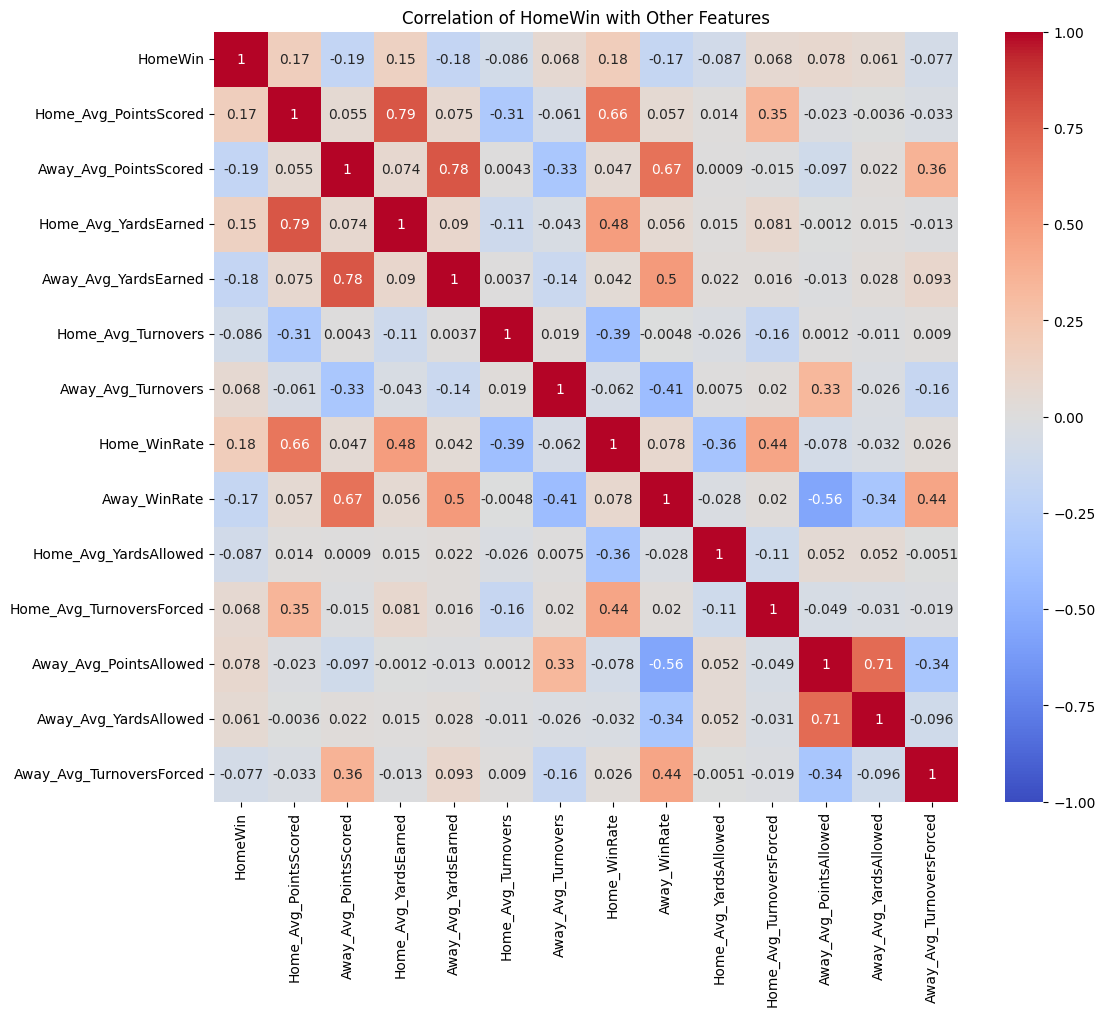

In [19]:
# Select columns
corr_columns = [
    'HomeWin', 'Home_Avg_PointsScored', 'Away_Avg_PointsScored', 'Home_Avg_YardsEarned', 
    'Away_Avg_YardsEarned', 'Home_Avg_Turnovers', 'Away_Avg_Turnovers', 'Home_WinRate', 
    'Away_WinRate', 'Home_Avg_YardsAllowed', 'Home_Avg_TurnoversForced', 'Away_Avg_PointsAllowed', 
    'Away_Avg_YardsAllowed', 'Away_Avg_TurnoversForced'
]

# calc corr matrix
corr_matrix = games[corr_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation of HomeWin with Other Features")
plt.show()


In [20]:
corr_matrix

HomeWin  Home_Avg_PointsScored  \
HomeWin                   1.000000               0.167311   
Home_Avg_PointsScored     0.167311               1.000000   
Away_Avg_PointsScored    -0.185811               0.054835   
Home_Avg_YardsEarned      0.146055               0.785795   
Away_Avg_YardsEarned     -0.178682               0.074630   
Home_Avg_Turnovers       -0.085824              -0.306807   
Away_Avg_Turnovers        0.067625              -0.061057   
Home_WinRate              0.179280               0.662792   
Away_WinRate             -0.165176               0.056787   
Home_Avg_YardsAllowed    -0.087375               0.014150   
Home_Avg_TurnoversForced  0.067633               0.345602   
Away_Avg_PointsAllowed    0.078251              -0.022814   
Away_Avg_YardsAllowed     0.060779              -0.003563   
Away_Avg_TurnoversForced -0.077236              -0.032898   

                          Away_Avg_PointsScored  Home_Avg_YardsEarned  \
HomeWin                               -0.185811              0.146055   
Home_Avg_PointsScored                  0.054835              0.785795   
Away_Avg_PointsScored                  1.000000              0.073803   
Home_Avg_YardsEarned                   0.073803              1.000000   
Away_Avg_YardsEarned                   0.781568              0.089869   
Home_Avg_Turnovers                     0.004262             -0.112720   
Away_Avg_Turnovers                    -0.329956             -0.043213   
Home_WinRate                           0.047218              0.480316   
Away_WinRate                           0.672904              0.055820   
Home_Avg_YardsAllowed                  0.000903              0.014561   
Home_Avg_TurnoversForced              -0.015209              0.080901   
Away_Avg_PointsAllowed                -0.097325             -0.001205   
Away_Avg_YardsAllowed                  0.021715              0.015291   
Away_Avg_TurnoversForced               0.361364             -0.013485   

                          Away_Avg_YardsEarned  Home_Avg_Turnovers  \
HomeWin                              -0.178682           -0.085824   
Home_Avg_PointsScored                 0.074630           -0.306807   
Away_Avg_PointsScored                 0.781568            0.004262   
Home_Avg_YardsEarned                  0.089869           -0.112720   
Away_Avg_YardsEarned                  1.000000            0.003681   
Home_Avg_Turnovers                    0.003681            1.000000   
Away_Avg_Turnovers                   -0.136570            0.018819   
Home_WinRate                          0.042456           -0.394950   
Away_WinRate                          0.497380           -0.004792   
Home_Avg_YardsAllowed                 0.021902           -0.026195   
Home_Avg_TurnoversForced              0.015685           -0.156797   
Away_Avg_PointsAllowed               -0.012730            0.001202   
Away_Avg_YardsAllowed                 0.028272           -0.010771   
Away_Avg_TurnoversForced              0.092501            0.009018   

                          Away_Avg_Turnovers  Home_WinRate  Away_WinRate  \
HomeWin                             0.067625      0.179280     -0.165176   
Home_Avg_PointsScored              -0.061057      0.662792      0.056787   
Away_Avg_PointsScored              -0.329956      0.047218      0.672904   
Home_Avg_YardsEarned               -0.043213      0.480316      0.055820   
Away_Avg_YardsEarned               -0.136570      0.042456      0.497380   
Home_Avg_Turnovers                  0.018819     -0.394950     -0.004792   
Away_Avg_Turnovers                  1.000000     -0.062245     -0.411777   
Home_WinRate                       -0.062245      1.000000      0.078296   
Away_WinRate                       -0.411777      0.078296      1.000000   
Home_Avg_YardsAllowed               0.007469     -0.355457     -0.027854   
Home_Avg_TurnoversForced            0.020429      0.440334      0.019854   
Away_Avg_PointsAllowed              0.328932     -0.

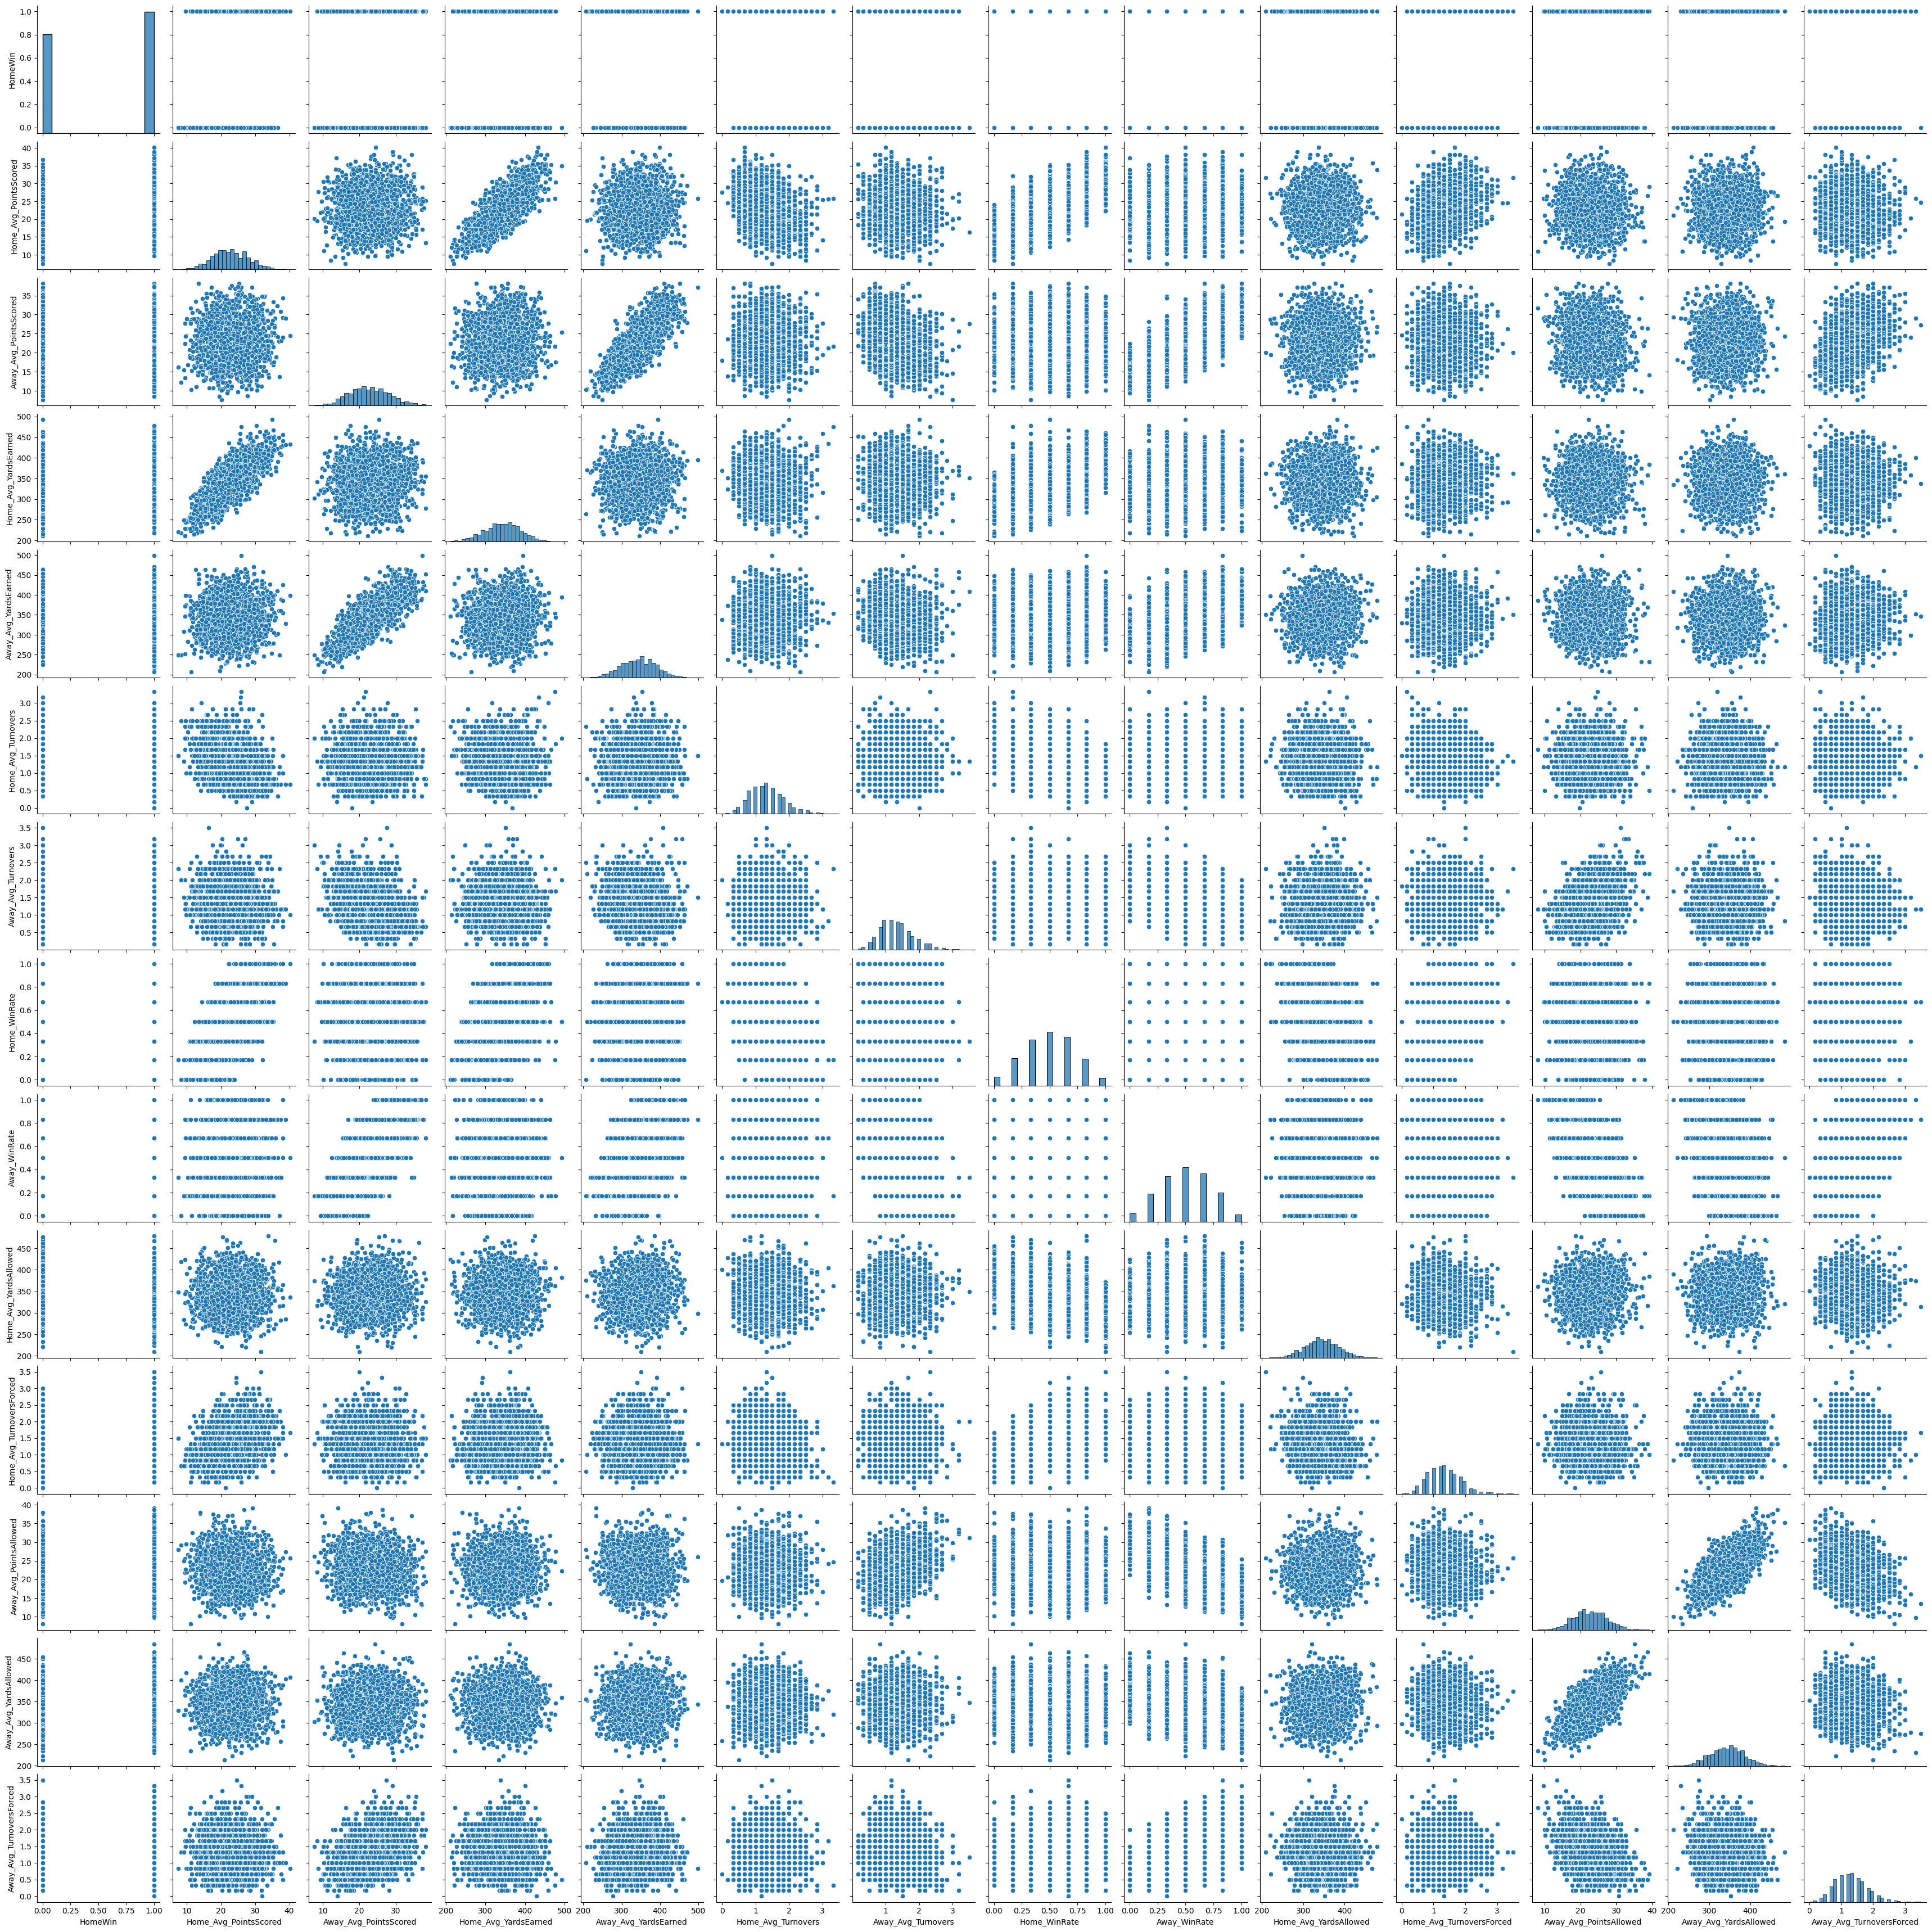

In [21]:
# PairPlot
sns.pairplot(games[corr_columns])
plt.show()

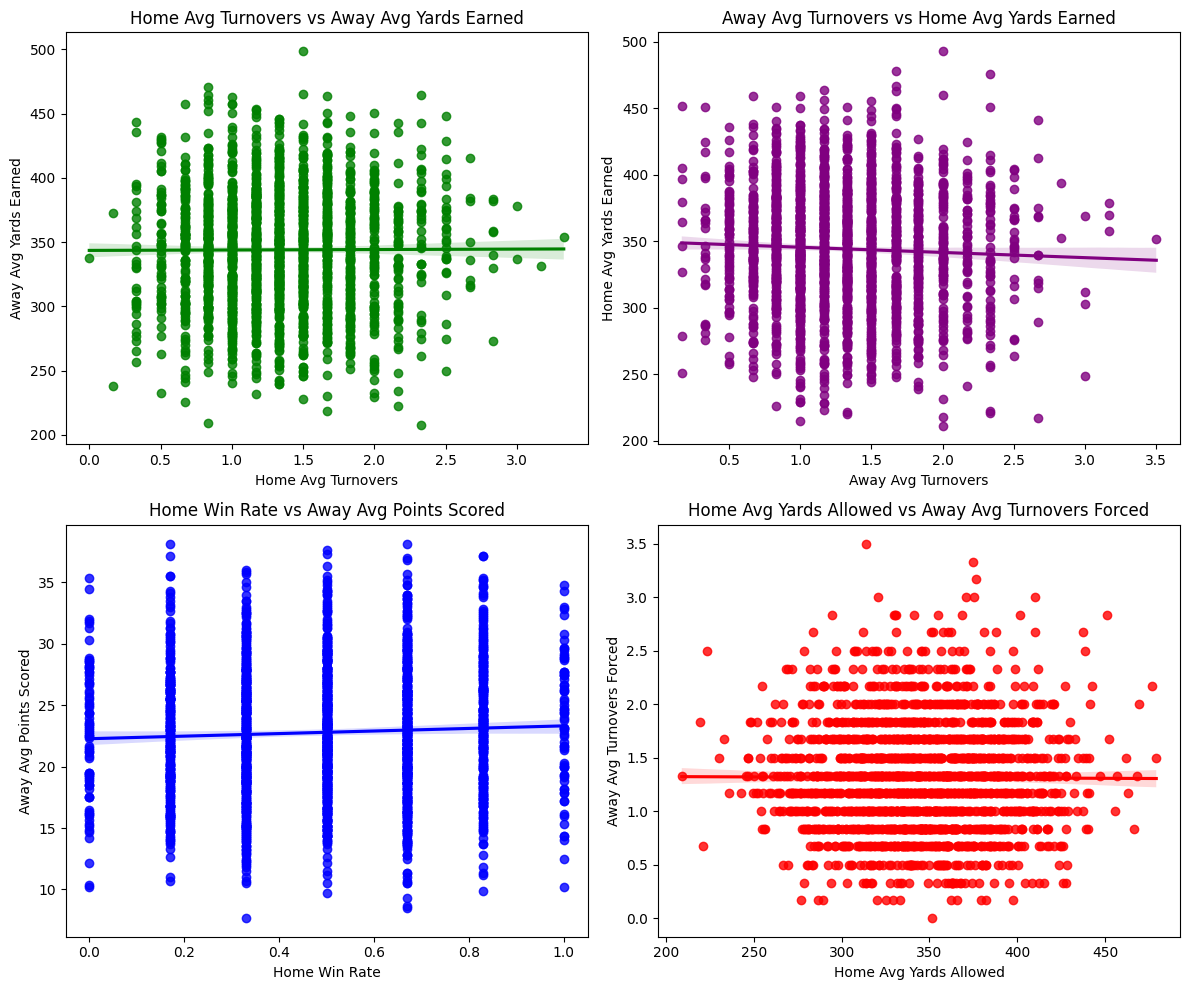

In [ ]:
# Set up a 2x2 grid for subplots
plt.figure(figsize=(12, 10))

# Scatter plot 1: Home Average Turnovers vs Away Average Yards Earned
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first subplot
sns.regplot(data=games, x='Home_Avg_Turnovers', y='Away_Avg_YardsEarned', fit_reg=True)
plt.title("Home Avg Turnovers vs Away Avg Yards Earned")
plt.xlabel("Home Avg Turnovers")
plt.ylabel("Away Avg Yards Earned")

# Scatter plot 2: Away Average Turnovers vs Home Average Yards Earned
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second subplot
sns.regplot(data=games, x='Away_Avg_Turnovers', y='Home_Avg_YardsEarned', fit_reg=True)
plt.title("Away Avg Turnovers vs Home Avg Yards Earned")
plt.xlabel("Away Avg Turnovers")
plt.ylabel("Home Avg Yards Earned")

# Scatter plot 3: Home Win Rate vs Away Average Points Scored
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third subplot
sns.regplot(data=games, x='Home_WinRate', y='Away_Avg_PointsScored', fit_reg=True)
plt.title("Home Win Rate vs Away Avg Points Scored")
plt.xlabel("Home Win Rate")
plt.ylabel("Away Avg Points Scored")

# Scatter plot 4: Home Average Yards Allowed vs Away Average Turnovers Forced
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth subplot
sns.regplot(data=games, x='Home_Avg_YardsAllowed', y='Away_Avg_TurnoversForced', fit_reg=True)
plt.title("Home Avg Yards Allowed vs Away Avg Turnovers Forced")
plt.xlabel("Home Avg Yards Allowed")
plt.ylabel("Away Avg Turnovers Forced")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()



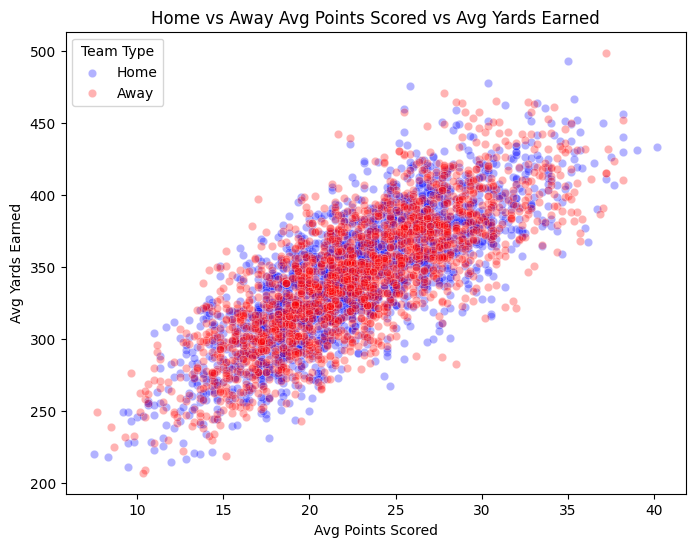

In [32]:
# Set up the figure
plt.figure(figsize=(8, 6))

# Scatter plot: Home Average Points Scored vs Home Average Yards Earned (in blue)
sns.scatterplot(data=games, x='Home_Avg_PointsScored', y='Home_Avg_YardsEarned', color='blue', label='Home', alpha=0.3)

# Scatter plot: Away Average Points Scored vs Away Average Yards Earned (in orange)
sns.scatterplot(data=games, x='Away_Avg_PointsScored', y='Away_Avg_YardsEarned', color='red', label='Away', alpha=0.3)

# Set title and labels
plt.title("Home vs Away Avg Points Scored vs Avg Yards Earned")
plt.xlabel("Avg Points Scored")
plt.ylabel("Avg Yards Earned")

# Add legend
plt.legend(title="Team Type")

# Show the plot
plt.show()

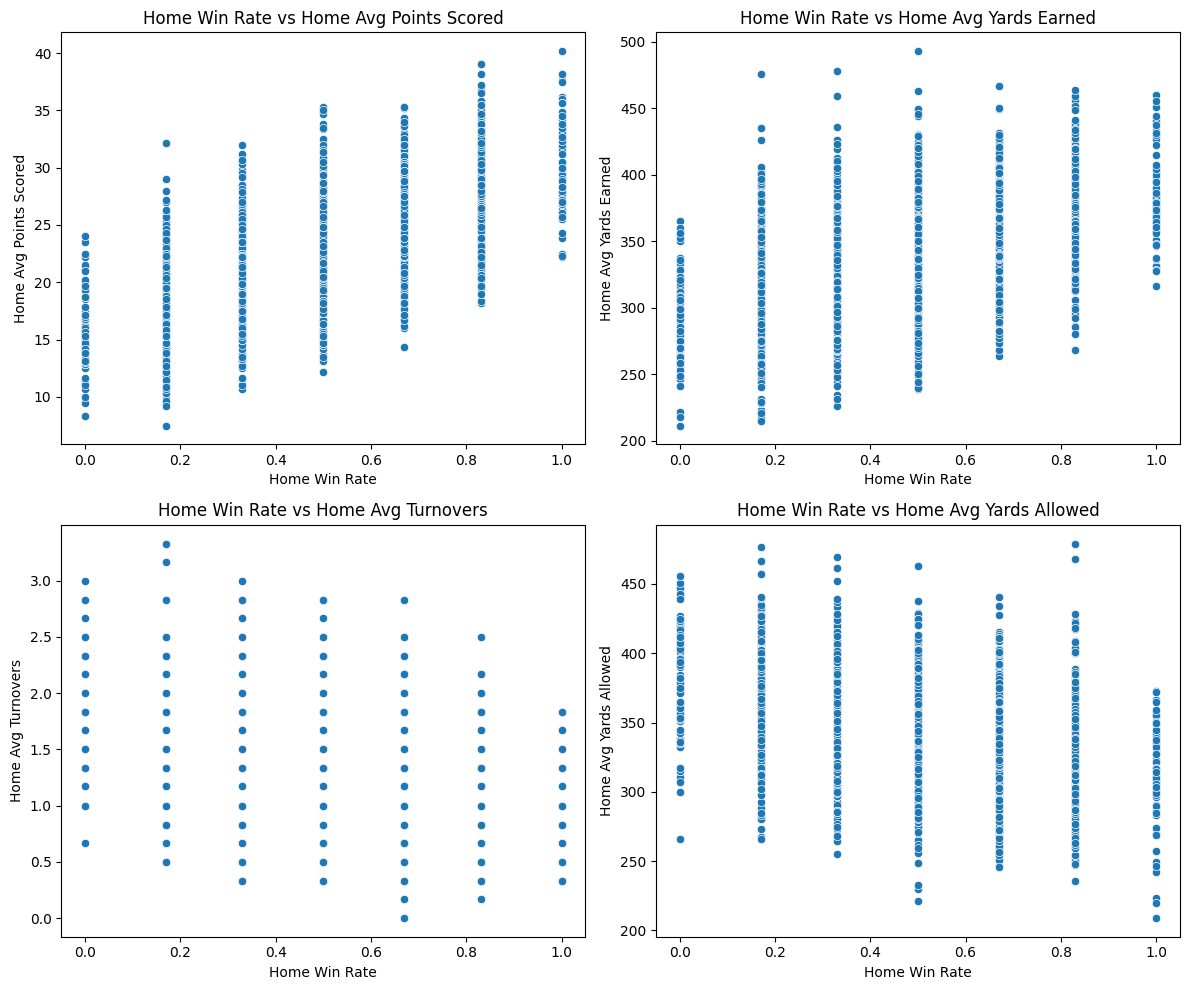

In [36]:
# Set up a 2x2 grid for subplots
plt.figure(figsize=(12, 10))

# Scatter plot 1: Home Win Rate vs Home Average Points Scored
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, first subplot
sns.scatterplot(data=games, x='Home_WinRate', y='Home_Avg_PointsScored')
plt.title("Home Win Rate vs Home Avg Points Scored")
plt.xlabel("Home Win Rate")
plt.ylabel("Home Avg Points Scored")

# Scatter plot 2: Home Win Rate vs Home Average Yards Earned
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, second subplot
sns.scatterplot(data=games, x='Home_WinRate', y='Home_Avg_YardsEarned')
plt.title("Home Win Rate vs Home Avg Yards Earned")
plt.xlabel("Home Win Rate")
plt.ylabel("Home Avg Yards Earned")

# Scatter plot 3: Home Win Rate vs Home Average Turnovers
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, third subplot
sns.scatterplot(data=games, x='Home_WinRate', y='Home_Avg_Turnovers')
plt.title("Home Win Rate vs Home Avg Turnovers")
plt.xlabel("Home Win Rate")
plt.ylabel("Home Avg Turnovers")

# Scatter plot 4: Home Win Rate vs Home Average Yards Allowed
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, fourth subplot
sns.scatterplot(data=games, x='Home_WinRate', y='Home_Avg_YardsAllowed')
plt.title("Home Win Rate vs Home Avg Yards Allowed")
plt.xlabel("Home Win Rate")
plt.ylabel("Home Avg Yards Allowed")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()